In [1]:
!pip install tensorflow==2.4
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.4.0


In [1]:
!pip install musicnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from musicnn.tagger import top_tags


In [3]:
from musicnn.extractor import extractor


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
top_tags('/content/drive/MyDrive/dataset/sample1/arthur_yoria-of_the_lovely-06-say_hello-146-175.mp3')

/usr/local/lib/python3.7/dist-packages/musicnn/models.py:58: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  normalized_input = tf.compat.v1.layers.batch_normalization(expand_input, training=is_training)
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/normalization.py:455: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs, training=training)
/usr/local/lib/python3.7/dist-packages/musicnn/models.py:107: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  activation=activation)
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_la

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


done!
[/content/drive/MyDrive/dataset/sample1/arthur_yoria-of_the_lovely-06-say_hello-146-175.mp3] Top3 tags: 
 - male
 - male vocal
 - pop


['male', 'male vocal', 'pop']

In [7]:
file_name = '/content/drive/MyDrive/dataset/sample1/arthur_yoria-of_the_lovely-06-say_hello-59-88.mp3'
taggram, tags = extractor(file_name, model='MTT_musicnn', extract_features=False)


/usr/local/lib/python3.7/dist-packages/musicnn/models.py:58: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  normalized_input = tf.compat.v1.layers.batch_normalization(expand_input, training=is_training)
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/normalization.py:455: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs, training=training)
/usr/local/lib/python3.7/dist-packages/musicnn/models.py:107: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  activation=activation)
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_la

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


done!


In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
in_length = 4 # seconds  by default, the model takes inputs of 3 seconds with no overlap

plt.rcParams["figure.figsize"] = (10,8) # set size of the figures
fontsize = 12 # set figures font size

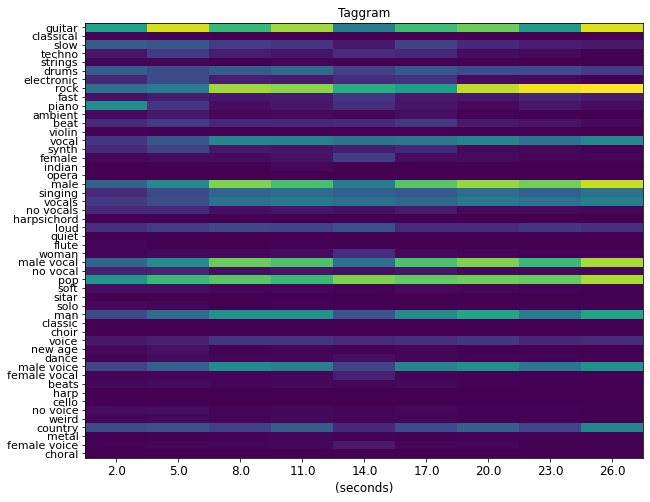

In [10]:
fig, ax = plt.subplots()

# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

# depict taggram
ax.imshow(taggram.T, interpolation=None, aspect="auto")
plt.show()

In [11]:
from musicnn.extractor import extractor
taggram, tags, features = extractor(file_name, model='MTT_musicnn', extract_features=True)

/usr/local/lib/python3.7/dist-packages/musicnn/models.py:58: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  normalized_input = tf.compat.v1.layers.batch_normalization(expand_input, training=is_training)
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/normalization.py:455: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs, training=training)
/usr/local/lib/python3.7/dist-packages/musicnn/models.py:107: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  activation=activation)
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_la

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


done!


In [12]:
import numpy as np
frontend_features = np.concatenate([features['temporal'], features['timbral']], axis=1)


In [13]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

def depict_features(features, coordinates, title, aspect='auto', xlabel=True, fontsize=13):
    # plot features in coordinates
    ax = plt.subplot(coordinates) 
    plt.imshow(features.T, interpolation=None, aspect=aspect)
    # set title
    ax.title.set_text(title + ' (' + str(features.shape[1]) + ')' )
    ax.title.set_fontsize(fontsize)
    # y-axis
    ax.get_yaxis().set_visible(False)
    # x-axis
    x_label = np.arange(0, features.shape[0], features.shape[0]//5)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, fontsize=fontsize)
    if xlabel:
        ax.set_xlabel('(time frames)', fontsize=fontsize)

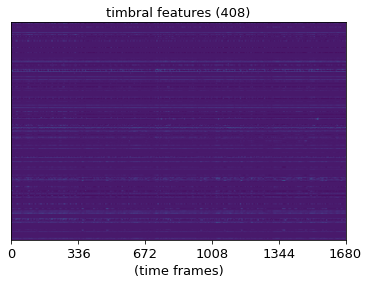

In [14]:
gs = gridspec.GridSpec(1, 1) # create a figure having 1 rows and 1 cols.
depict_features(features=features['timbral'],
                coordinates=gs[0, 0],
                title='timbral features',
                aspect='auto')
plt.show()

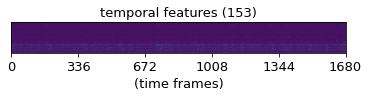

In [15]:
gs = gridspec.GridSpec(1, 1) # create a figure having 1 rows and 3 cols.
depict_features(features=features['temporal'],
                coordinates=gs[0, 0],
                title='temporal features',
                aspect='equal')
plt.show()